In [106]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

In [107]:
df = pd.read_csv('Financials.csv')
df

,Segment,Country,Product,Discount Band,Units Sold,Manufacturing Price,Sale Price,Gross Sales,Discounts,Sales,COGS,Profit,Date,Month Number,Month Name,Year
0,Government,Canada,Carretera,None,"$1,618.50",$3.00,$20.00,"$32,370.00",$-,"$32,370.00","$16,185.00","$16,185.00",01/01/2014,1,January,2014
1,Government,Germany,Carretera,None,"$1,321.00",$3.00,$20.00,"$26,420.00",$-,"$26,420.00","$13,210.00","$13,210.00",01/01/2014,1,January,2014
2,Midmarket,France,Carretera,None,"$2,178.00",$3.00,$15.00,"$32,670.00",$-,"$32,670.00","$21,780.00","$10,890.00",01/06/2014,6,June,2014
3,Midmarket,Germany,Carretera,None,$888.00,$3.00,$15.00,"$13,320.00",$-,"$13,320.00","$8,880.00","$4,440.00",01/06/2014,6,June,2014
4,Midmarket,Mexico,Carretera,None,"$2,470.00",$3.00,$15.00,"$37,050.00",$-,"$37,050.00","$24,700.00","$12,350.00",01/06/2014,6,June,2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,Small Business,France,Amarilla,High,"$2,475.00",$260.00,$300.00,"$7,42,500.00","$1,11,375.00","$6,31,125.00","$6,18,750.00","$12,375.00",01/03/2014,3,March,2014
696,Small Business,Mexico,Amarilla,High,$546.00,$260.00,$300.00,"$1,63,800.00","$24,570.00","$1,39,230.00","$1,36,500.00","$2,730.00",01/10/2014,10,October,2014
697,Government,Mexico,Montana,High,"$1,368.00",$5.00,$7.00,"$9,576.00","$1,436.40","$8,139.60","$6,840.00","$1,299.60",01/02/2014,2,February,2014
698,Government,Canada,Paseo,High,$723.00,$10.00,$7.00,"$5,061.00",$759.15,"$4,301.85","$3,615.00",$686.85,01/04/2014,4,April,2014


In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Segment                700 non-null    object
 1   Country                700 non-null    object
 2    Product               700 non-null    object
 3    Discount Band         700 non-null    object
 4    Units Sold            700 non-null    object
 5    Manufacturing Price   700 non-null    object
 6    Sale Price            700 non-null    object
 7    Gross Sales           700 non-null    object
 8    Discounts             700 non-null    object
 9     Sales                700 non-null    object
 10   COGS                  700 non-null    object
 11   Profit                700 non-null    object
 12  Date                   700 non-null    object
 13  Month Number           700 non-null    int64 
 14   Month Name            700 non-null    object
 15  Year                   

In [109]:
df.columns

Index(['Segment', 'Country', ' Product ', ' Discount Band ', ' Units Sold ',
       ' Manufacturing Price ', ' Sale Price ', ' Gross Sales ', ' Discounts ',
       '  Sales ', ' COGS ', ' Profit ', 'Date', 'Month Number',
       ' Month Name ', 'Year'],
      dtype='object')

In [110]:
# Remove leading and trailing spaces from column names
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')
df.columns

Index(['segment', 'country', 'product', 'discount_band', 'units_sold',
       'manufacturing_price', 'sale_price', 'gross_sales', 'discounts',
       'sales', 'cogs', 'profit', 'date', 'month_number', 'month_name',
       'year'],
      dtype='object')

In [111]:
# Remove redundant columns
df = df.drop(['month_number', 'month_name', 'year'], axis=1)
df

,segment,country,product,discount_band,units_sold,manufacturing_price,sale_price,gross_sales,discounts,sales,cogs,profit,date
0,Government,Canada,Carretera,None,"$1,618.50",$3.00,$20.00,"$32,370.00",$-,"$32,370.00","$16,185.00","$16,185.00",01/01/2014
1,Government,Germany,Carretera,None,"$1,321.00",$3.00,$20.00,"$26,420.00",$-,"$26,420.00","$13,210.00","$13,210.00",01/01/2014
2,Midmarket,France,Carretera,None,"$2,178.00",$3.00,$15.00,"$32,670.00",$-,"$32,670.00","$21,780.00","$10,890.00",01/06/2014
3,Midmarket,Germany,Carretera,None,$888.00,$3.00,$15.00,"$13,320.00",$-,"$13,320.00","$8,880.00","$4,440.00",01/06/2014
4,Midmarket,Mexico,Carretera,None,"$2,470.00",$3.00,$15.00,"$37,050.00",$-,"$37,050.00","$24,700.00","$12,350.00",01/06/2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,Small Business,France,Amarilla,High,"$2,475.00",$260.00,$300.00,"$7,42,500.00","$1,11,375.00","$6,31,125.00","$6,18,750.00","$12,375.00",01/03/2014
696,Small Business,Mexico,Amarilla,High,$546.00,$260.00,$300.00,"$1,63,800.00","$24,570.00","$1,39,230.00","$1,36,500.00","$2,730.00",01/10/2014
697,Government,Mexico,Montana,High,"$1,368.00",$5.00,$7.00,"$9,576.00","$1,436.40","$8,139.60","$6,840.00","$1,299.60",01/02/2014
698,Government,Canada,Paseo,High,$723.00,$10.00,$7.00,"$5,061.00",$759.15,"$4,301.85","$3,615.00",$686.85,01/04/2014


In [112]:
# Convert numeric columns to float
numeric_cols = ["units_sold","manufacturing_price","sale_price","gross_sales","discounts","sales","cogs","profit"]

for col in numeric_cols:
    df[col] = pd.to_numeric(df[col].replace(
        r"[^0-9.-]", "", regex=True), errors="coerce")

df

,segment,country,product,discount_band,units_sold,manufacturing_price,sale_price,gross_sales,discounts,sales,cogs,profit,date
0,Government,Canada,Carretera,None,1618.5,3.0,20.0,32370.0,NaN,32370.00,16185.0,16185.00,01/01/2014
1,Government,Germany,Carretera,None,1321.0,3.0,20.0,26420.0,NaN,26420.00,13210.0,13210.00,01/01/2014
2,Midmarket,France,Carretera,None,2178.0,3.0,15.0,32670.0,NaN,32670.00,21780.0,10890.00,01/06/2014
3,Midmarket,Germany,Carretera,None,888.0,3.0,15.0,13320.0,NaN,13320.00,8880.0,4440.00,01/06/2014
4,Midmarket,Mexico,Carretera,None,2470.0,3.0,15.0,37050.0,NaN,37050.00,24700.0,12350.00,01/06/2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,Small Business,France,Amarilla,High,2475.0,260.0,300.0,742500.0,111375.00,631125.00,618750.0,12375.00,01/03/2014
696,Small Business,Mexico,Amarilla,High,546.0,260.0,300.0,163800.0,24570.00,139230.00,136500.0,2730.00,01/10/2014
697,Government,Mexico,Montana,High,1368.0,5.0,7.0,9576.0,1436.40,8139.60,6840.0,1299.60,01/02/2014
698,Government,Canada,Paseo,High,723.0,10.0,7.0,5061.0,759.15,4301.85,3615.0,686.85,01/04/2014


In [113]:
# fill missing values with the mean
df["discounts"].fillna(df["discounts"].mean(), inplace=True)
df["profit"].fillna(df["profit"].mean(), inplace=True)

df.isnull().sum()

segment                0
country                0
product                0
discount_band          0
units_sold             0
manufacturing_price    0
sale_price             0
gross_sales            0
discounts              0
sales                  0
cogs                   0
profit                 0
date                   0
dtype: int64

In [114]:
df['date'] = pd.to_datetime(df['date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   segment              700 non-null    object        
 1   country              700 non-null    object        
 2   product              700 non-null    object        
 3   discount_band        700 non-null    object        
 4   units_sold           700 non-null    float64       
 5   manufacturing_price  700 non-null    float64       
 6   sale_price           700 non-null    float64       
 7   gross_sales          700 non-null    float64       
 8   discounts            700 non-null    float64       
 9   sales                700 non-null    float64       
 10  cogs                 700 non-null    float64       
 11  profit               700 non-null    float64       
 12  date                 700 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(8), o

In [115]:
df.describe()

,units_sold,manufacturing_price,sale_price,gross_sales,discounts,sales,cogs,profit,date
count,700.000000,700.000000,700.000000,7.000000e+02,700.000000,7.000000e+02,700.000000,700.000000,700
mean,1608.294286,96.477143,118.428571,1.827594e+05,14227.586198,1.696091e+05,145475.211429,26544.380993,2013-10-08 15:36:00
min,200.000000,3.000000,7.000000,1.799000e+03,18.410000,1.655080e+03,918.000000,285.600000,2013-01-09 00:00:00
25%,905.000000,5.000000,12.000000,1.739175e+04,1188.960000,1.592800e+04,7490.000000,4087.052500,2013-10-04 12:00:00
50%,1542.500000,10.000000,20.000000,3.798000e+04,3872.000000,3.554020e+04,22506.250000,11364.600000,2014-01-05 12:00:00
75%,2229.125000,250.000000,300.000000,2.790250e+05,15956.347500,2.610775e+05,245607.500000,24274.800000,2014-01-09 06:00:00
max,4492.500000,260.000000,350.000000,1.207500e+06,149677.500000,1.159200e+06,950625.000000,262200.000000,2014-01-12 00:00:00
std,867.427859,108.602612,136.775515,2.542623e+05,22651.928275,2.367263e+05,203865.506118,41366.357835,NaN


In [116]:
# T-test: Compare profit between "Government" and "Midmarket" segments
gov_profit = df[df["segment"] == "Government"]["profit"]
mid_profit = df[df["segment"] == "Midmarket"]["profit"]
t_stat, p_value_ttest = stats.ttest_ind(
    gov_profit, mid_profit, equal_var=False)

print(f"T-test (Profit: Gov vs. Midmarket):")
print(f"\t- t-statistic: {t_stat}")
print(f"\t- p-value: {p_value_ttest}")

T-test (Profit: Gov vs. Midmarket):
	- t-statistic: 9.62280270519155
	- p-value: 2.533935993051536e-19


In [117]:
# ANOVA: Test if sales differ significantly across product categories
sales_by_product = [df[df["product"] == product]["sales"]
                    for product in df["product"].unique()]
f_stat, p_value_anova = stats.f_oneway(*sales_by_product)

print(f"ANOVA (Sales across Products):")
print(f"\t- F-statistic: {f_stat}")
print(f"\t- p-value: {p_value_anova}")

ANOVA (Sales across Products):
	- F-statistic: 0.4382196383492076
	- p-value: 0.8219373483803954


In [118]:
# Correlation Test: Discounts vs. Sales
corr_coef, p_value_corr = stats.pearsonr(df["discounts"], df["sales"])

print(f"Correlation (Discounts vs. Sales):")
print(f"\t- Correlation Coefficient: {corr_coef}")
print(f"\t- p-value: {p_value_corr}")

Correlation (Discounts vs. Sales):
	- Correlation Coefficient: 0.749684994885911
	- p-value: 2.947217024146085e-127


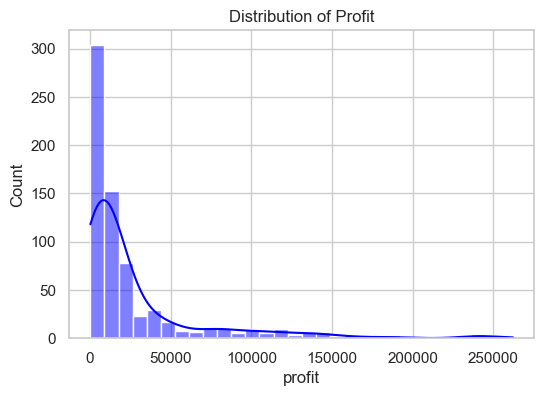

In [119]:
# Profit Distribution
plt.figure(figsize=(6, 4))
sns.histplot(df["profit"], bins=30, kde=True, color="blue")
plt.title("Distribution of Profit")
plt.show()

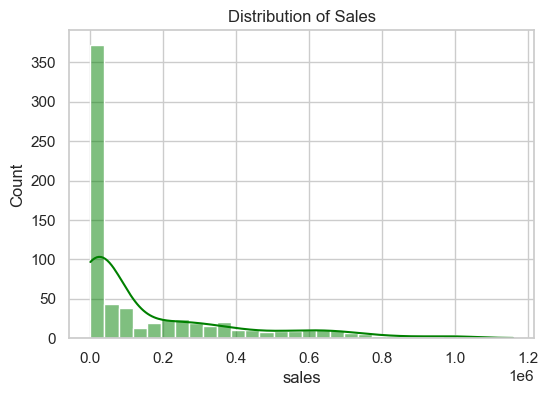

In [120]:
# Sales Distribution
plt.figure(figsize=(6, 4))
sns.histplot(df["sales"], bins=30, kde=True, color="green")
plt.title("Distribution of Sales")
plt.show()

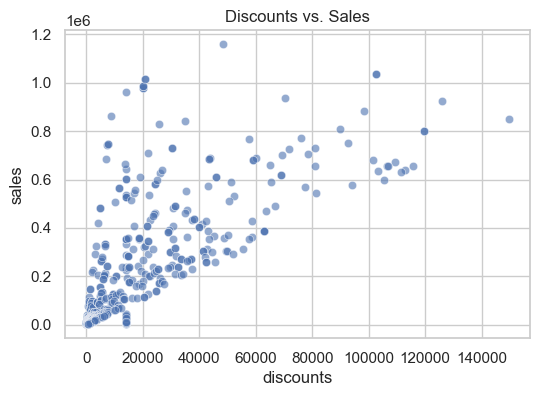

In [121]:
# Discounts vs. Sales Scatter Plot
plt.figure(figsize=(6, 4))
sns.scatterplot(x=df["discounts"], y=df["sales"], alpha=0.6)
plt.title("Discounts vs. Sales")
plt.show()